In [660]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
import warnings 
warnings.filterwarnings('ignore')

In [661]:
import pandas as pd
#import the data
data=pd.read_html(r'https://github.com/campusx-official/laptop-price-predictor-regression-project/blob/main/laptop_data.csv')


In [662]:
#Since we have imported the data in list format we will take the first index and assign it to data
data=data[0]

In [663]:
data.drop(columns=['Unnamed: 0','Unnamed: 1'], inplace=True)

In [664]:
data.shape

(1303, 11)

In [665]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [666]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [667]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [668]:
data.duplicated().sum()

29

In [669]:
data.drop_duplicates(inplace=True)

In [670]:
data.duplicated().sum()

0

In [671]:
# lets remove 'GB' from Ram column and remove 'kg' from Weight column and convert its datatype to integer/float
data['Ram']=data['Ram'].str.replace('GB','').astype('int')
data['Weight']=data['Weight'].str.replace('kg','').astype('float')

In [672]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 114.5+ KB


<AxesSubplot:xlabel='Price', ylabel='Count'>

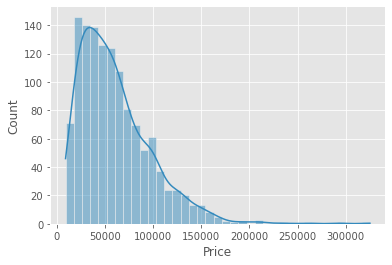

In [673]:
sns.histplot(data['Price'], kde=True,)

- We can clearly see that the Price column as skewed distribution.

In [674]:
data.OpSys.value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

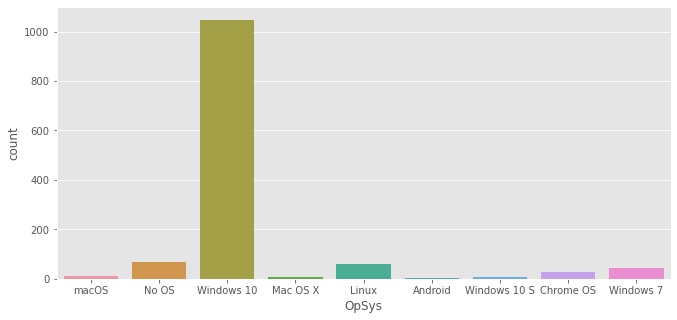

In [675]:
plt.figure(figsize=[11,5])
sns.countplot(data.OpSys)
plt.show()

- Most of the laptops are Windows 10.

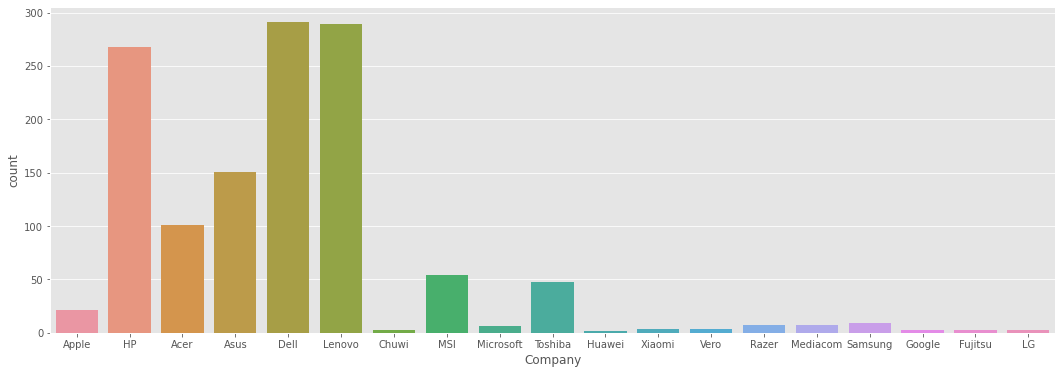

In [676]:
plt.figure(figsize=[18,6])
sns.countplot(data.Company)
plt.show()

- Most laptops brands are Dell and Lenovo

<AxesSubplot:xlabel='TypeName', ylabel='count'>

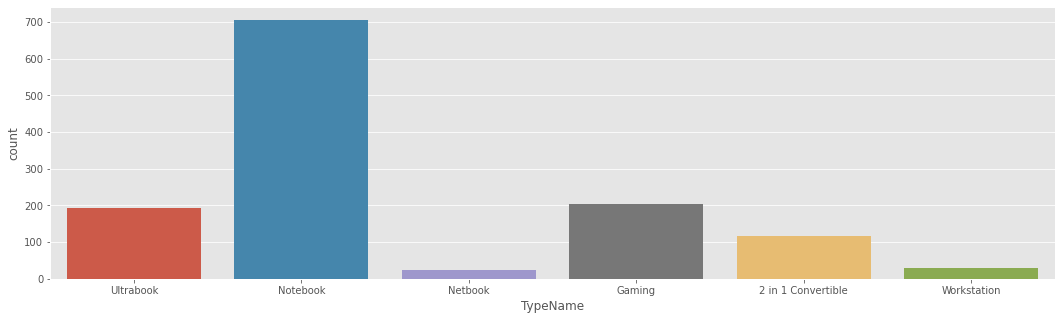

In [677]:
plt.figure(figsize=[18,5])
sns.countplot(data['TypeName'])

- Most of them are Notebook type laptops

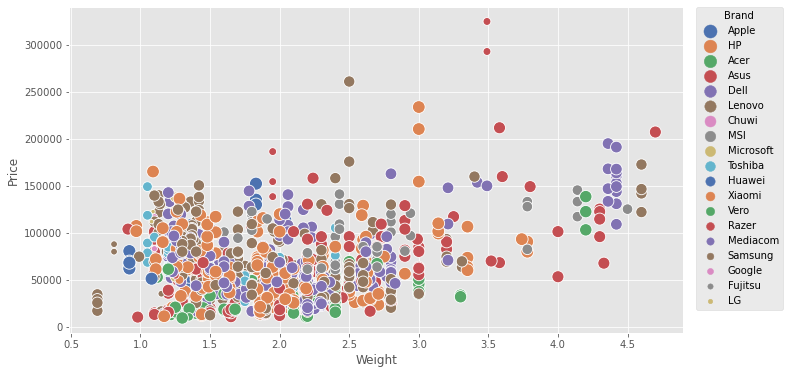

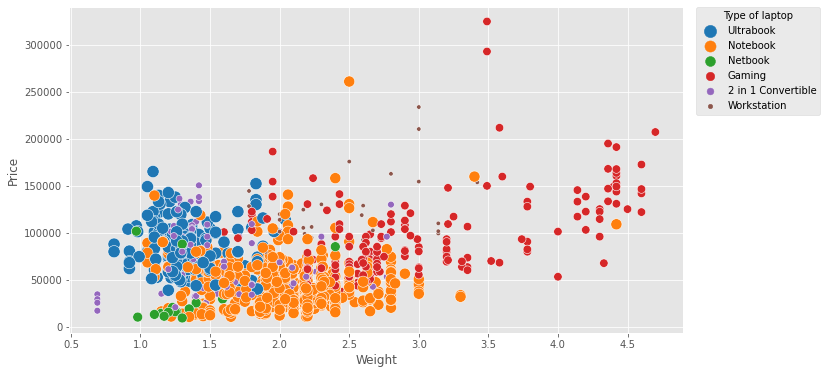

In [678]:
plt.figure(figsize=[11,6])
sns.scatterplot(x=data.Weight, y=data.Price, hue=data.Company, palette="deep", size=data.Company, sizes=(20, 170))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Brand')

plt.figure(figsize=[11,6])
sns.scatterplot(x=data.Weight, y=data.Price, hue=data.TypeName, size=data.TypeName, sizes=(20, 150), palette='tab10')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Type of laptop')
plt.show()

- Weight and price of razer laptops are high, Since those are gaming laptops with more hardware components for high performance.
- Ultrabooks have less weight and high price compared to Notebooks.

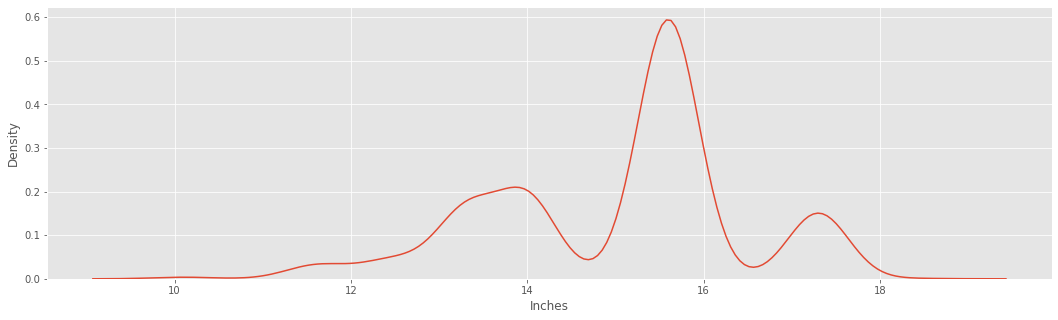

In [679]:
plt.figure(figsize=[18,5])
sns.kdeplot(data.Inches)
plt.show()

In [680]:
data.ScreenResolution.value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x1200               

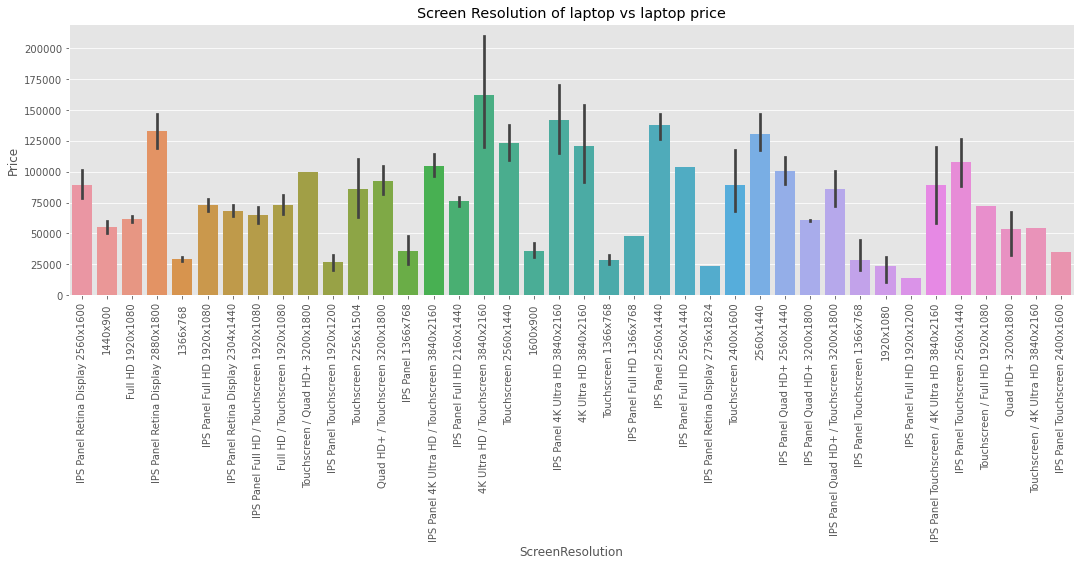

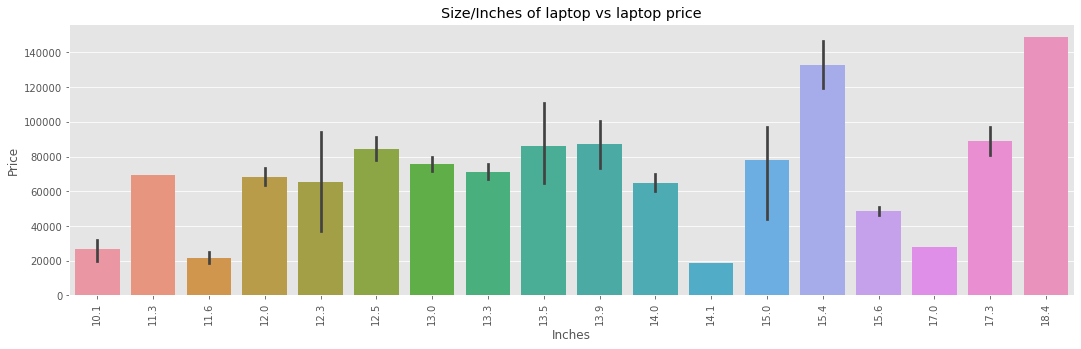

In [681]:
plt.figure(figsize=[18,5])
sns.barplot(x=data['ScreenResolution'], y=data['Price'])
plt.xticks(rotation= 'vertical')
plt.title('Screen Resolution of laptop vs laptop price')
plt.show()

print()

plt.figure(figsize=[18,5])
sns.barplot(x=data['Inches'], y=data['Price'])
plt.xticks(rotation= 'vertical')
plt.title('Size/Inches of laptop vs laptop price')
plt.show()

In [682]:
data.ScreenResolution.str.split('x', n=1, expand=True)

data['X_resolution']= data.ScreenResolution.str.split('x', n=1, expand=True)[0]
data['Y_resolution']= data.ScreenResolution.str.split('x', n=1, expand=True)[1]

#We have some strings in X_resolution columns so lets remove them using regex
data['X_resolution'].head()

0    IPS Panel Retina Display 2560
1                             1440
2                     Full HD 1920
3    IPS Panel Retina Display 2880
4    IPS Panel Retina Display 2560
Name: X_resolution, dtype: object

In [683]:
data['X_resolution']=data['X_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

data.X_resolution=data.X_resolution.astype('int')
data.Y_resolution=data.Y_resolution.astype('int')

In [684]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
 11  X_resolution      1274 non-null   int32  
 12  Y_resolution      1274 non-null   int32  
dtypes: float64(3), int32(3), object(7)
memory usage: 156.7+ KB


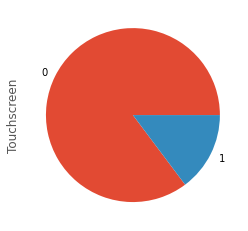

In [685]:
#Lets make a Touchscreen column for laptops which has touchscreen capability

data['Touchscreen']=data.ScreenResolution.apply(lambda x: 1 if 'Touchscreen' in x else 0)

data['Touchscreen'].value_counts(normalize=True).plot.pie()
plt.show()

- We have less number of Touch screen laptops

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

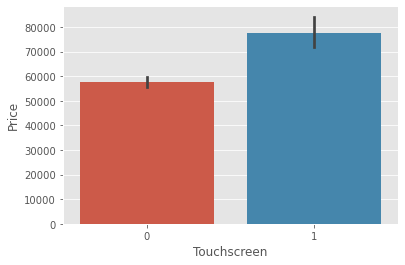

In [735]:
sns.barplot(x=data['Touchscreen'], y=data['Price'])

- Touchscreen are quite expensive

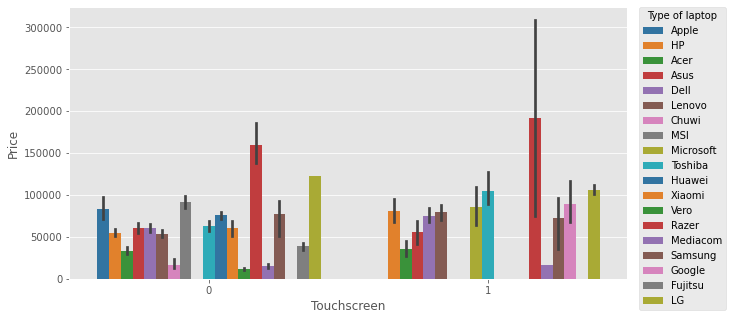

In [687]:
#Lets look which company brands have touchscreen supported laptops

plt.figure(figsize=[10,5])
sns.barplot(x=data.Touchscreen, y=data.Price, hue=data.Company, palette='tab10')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Type of laptop')
plt.show()

<AxesSubplot:>

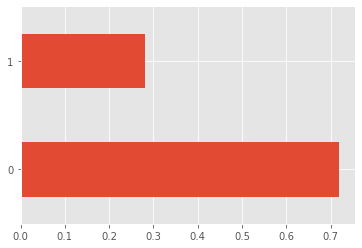

In [688]:
#Lets make a IPS panel column for laptops which has IPS panels in their screens
data['IPS_panel']=data.ScreenResolution.apply(lambda x: 1 if 'IPS' in x else 0)
data.IPS_panel.value_counts(normalize=True).plot.barh()

- We have less number of IPS panels displays

In [689]:
data['ppi']=(((data.X_resolution**2) + (data.Y_resolution**2))**0.5/data['Inches'])
data['ppi']=round(data.ppi.astype('float'),2)

In [690]:
data.corr()['Price']

Inches          0.066990
Ram             0.740106
Weight          0.212192
Price           1.000000
X_resolution    0.552074
Y_resolution    0.548111
Touchscreen     0.188631
IPS_panel       0.250358
ppi             0.469557
Name: Price, dtype: float64

- Price is highly correlated with Ram.
- X and Y resolutions and ppi are highly correlated with price.

In [691]:
#Lets drop ScreenResolution since we have extracted all important data
data.drop(columns=['ScreenResolution', 'Y_resolution', 'X_resolution'], inplace=True)

In [692]:
data.sample()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_panel,ppi
192,Xiaomi,Ultrabook,13.3,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,1.3,53274.672,0,1,165.63


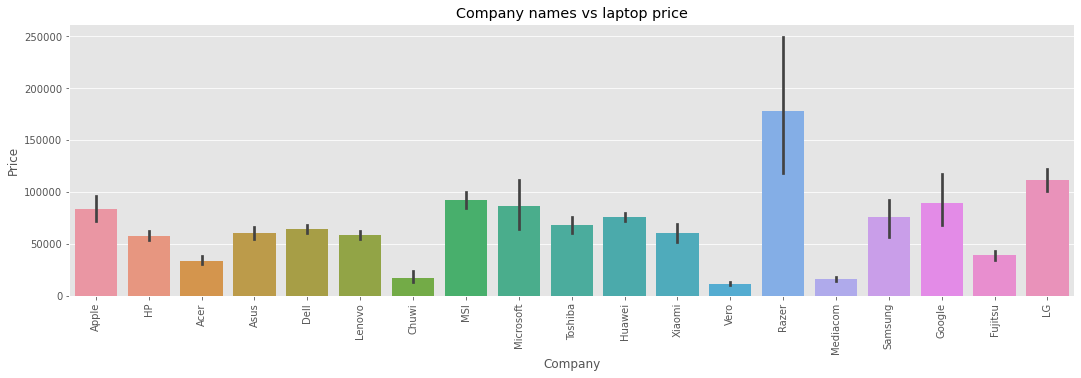

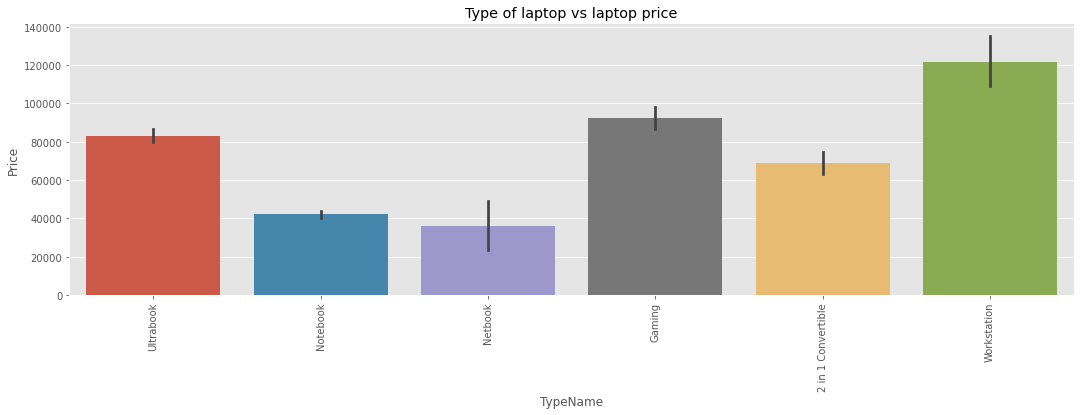

In [693]:
plt.figure(figsize=[18,5])
sns.barplot(x=data['Company'], y=data['Price'])
plt.xticks(rotation= 'vertical')
plt.title('Company names vs laptop price')
plt.show()

print()

plt.figure(figsize=[18,5])
sns.barplot(x=data['TypeName'], y=data['Price'])
plt.xticks(rotation= 'vertical')
plt.title('Type of laptop vs laptop price')
plt.show()

- Razer laptops are higly expensive
- Some affordable laptops are Acer, Asus and HP

- In Type of laptops workstation and gaming are most expensive laptops.

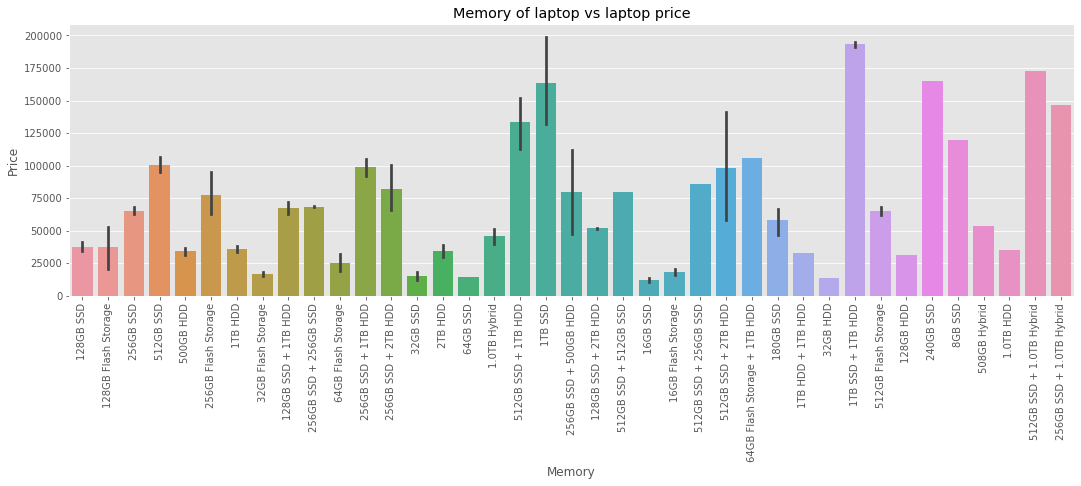

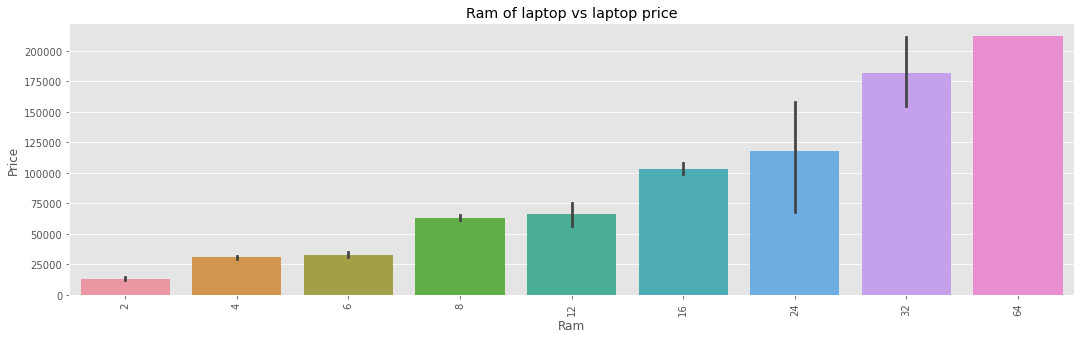

In [694]:
plt.figure(figsize=[18,5])
sns.barplot(x=data['Memory'], y=data['Price'])
plt.xticks(rotation= 'vertical')
plt.title('Memory of laptop vs laptop price')
plt.show()

print()

plt.figure(figsize=[18,5])
sns.barplot(x=data['Ram'], y=data['Price'])
plt.xticks(rotation= 'vertical')
plt.title('Ram of laptop vs laptop price')
plt.show()

- With memory type SSD are more expensive than compared to HDD.
- With the increase in Ram the price also increases.

In [695]:
data['Cpu_name'] = data.Cpu.apply(lambda x:' '.join(x.split()[0:3]))
data.head(2)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_panel,ppi,Cpu_name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5


In [696]:
def processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'    
        else:
            return 'AMD Processor'
        
        
data['Cpu_brand']= data.Cpu_name.apply(processor)

In [697]:
data.head(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS_panel,ppi,Cpu_name,Cpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,Intel Core i5


In [698]:
data.Cpu_brand.value_counts(normalize=True)*100

Intel Core i7            40.423862
Intel Core i5            33.202512
Other Intel Processor    11.067504
Intel Core i3            10.518053
AMD Processor             4.788069
Name: Cpu_brand, dtype: float64

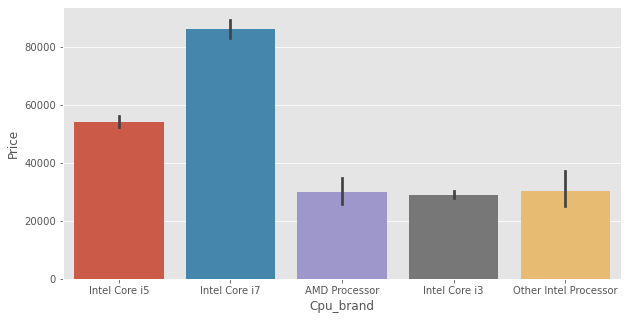

In [699]:
plt.figure(figsize=[10,5])
sns.barplot(x=data.Cpu_brand, y= data.Price)
plt.show()

- Intel Core i7 are most expensive laptops.
- Other processor laptops are affordable.

In [700]:
data.drop(columns=['Cpu', 'Cpu_name'], inplace=True)

In [701]:
#Lets analyse Memory column

In [702]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)

data["first"]= new[0]
data["first"]=data["first"].str.strip()

data["second"]= new[1]

data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['first'] = data['first'].str.replace(r'\D', '')

data["second"].fillna("0", inplace = True)


data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] =data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

data['second'] = data['second'].str.replace(r'\D', '')

data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)


data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])


#drop unnecessary columns including Memory
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage','Memory'],inplace=True)



data.sample()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS_panel,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
1177,Lenovo,Gaming,15.6,16,Nvidia GeForce GTX 960,Windows 10,3.31,69530.4,0,1,141.21,Intel Core i7,0,512,0,0


In [703]:
data.corr()['Price']

Inches           0.066990
Ram              0.740106
Weight           0.212192
Price            1.000000
Touchscreen      0.188631
IPS_panel        0.250358
ppi              0.469557
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

- We have negaive correlation for HDD and Flash storage, So the price decreases.
- SSD are expensive.

In [704]:
data.drop(columns=['Hybrid','Flash_Storage', 'Inches'], inplace=True)

In [705]:
data['Gpu_brand']=data['Gpu'].apply(lambda x: x.split()[0])

In [706]:
data.Gpu_brand.value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu_brand, dtype: int64

In [707]:
data=data[data.Gpu_brand !='ARM']

In [708]:
data.Gpu_brand.value_counts()

Intel     703
Nvidia    396
AMD       174
Name: Gpu_brand, dtype: int64

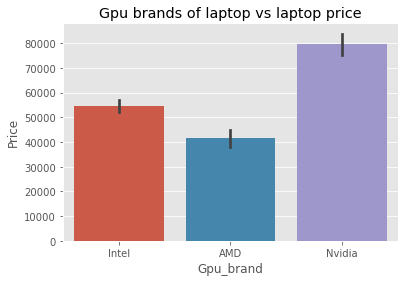

In [709]:
sns.barplot(x=data['Gpu_brand'], y=data['Price'])
plt.title('Gpu brands of laptop vs laptop price')
plt.show()

- Nvidia are most expensive.

In [710]:
data.drop(columns='Gpu', inplace=True)

In [711]:
data.sample()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS_panel,ppi,Cpu_brand,HDD,SSD,Gpu_brand
1179,HP,Notebook,4,Windows 10,2.07,34632.0,0,0,100.45,Intel Core i3,500,0,Intel


In [712]:
#Operating System

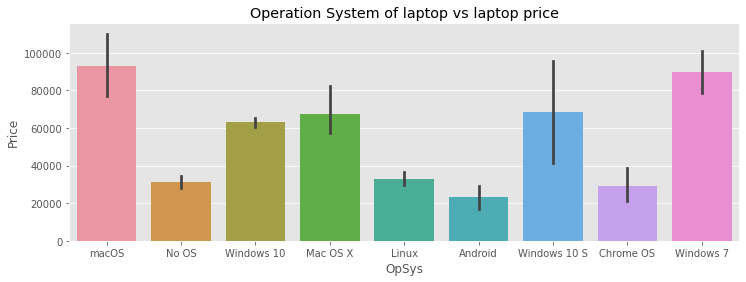

In [713]:
plt.figure(figsize=[12,4])
sns.barplot(x=data['OpSys'], y=data['Price'])
#plt.xticks(rotation= 'vertical')
plt.title('Operation System of laptop vs laptop price')
plt.show()

In [714]:
data['OpSys'].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

In [715]:
def operating_system(text):
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='macOS' or text=='Mac OS X':
        return 'Mac' 
    else:
        return 'Others/No OS/Linux'
        
        
        
#apply the function and create new column      
data['Operating_system']=data['OpSys'].apply(operating_system)


#drop the OpSys
data.drop(columns=['OpSys'], inplace=True)

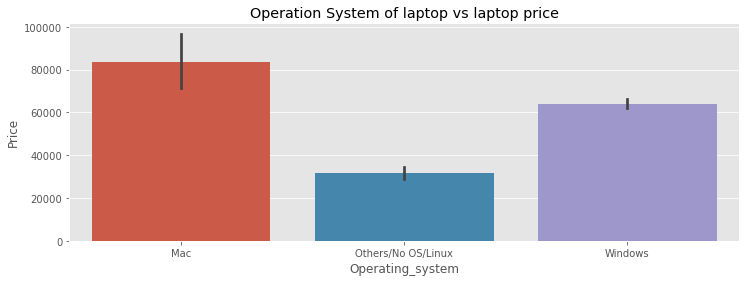

In [716]:
plt.figure(figsize=[12,4])
sns.barplot(x=data['Operating_system'], y=data['Price'])
#plt.xticks(rotation= 'vertical')
plt.title('Operation System of laptop vs laptop price')
plt.show()

- Most expensive are Mac operating sysytem laptops

<AxesSubplot:xlabel='Price', ylabel='Density'>

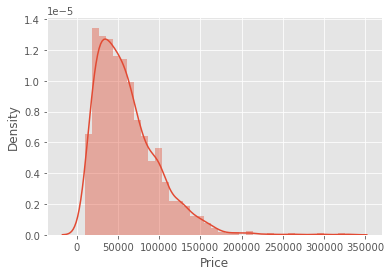

In [717]:
#Skewed Price data
sns.distplot(data.Price)

<AxesSubplot:xlabel='Price', ylabel='Density'>

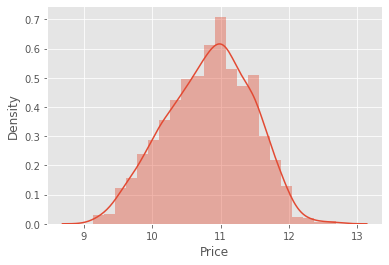

In [718]:
#Normalized Price data after applying log
sns.distplot(np.log(data.Price))

In [719]:
data.sample()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS_panel,ppi,Cpu_brand,HDD,SSD,Gpu_brand,Operating_system
74,Acer,Notebook,8,2.1,20725.92,0,0,111.94,Intel Core i3,1000,0,Intel,Windows


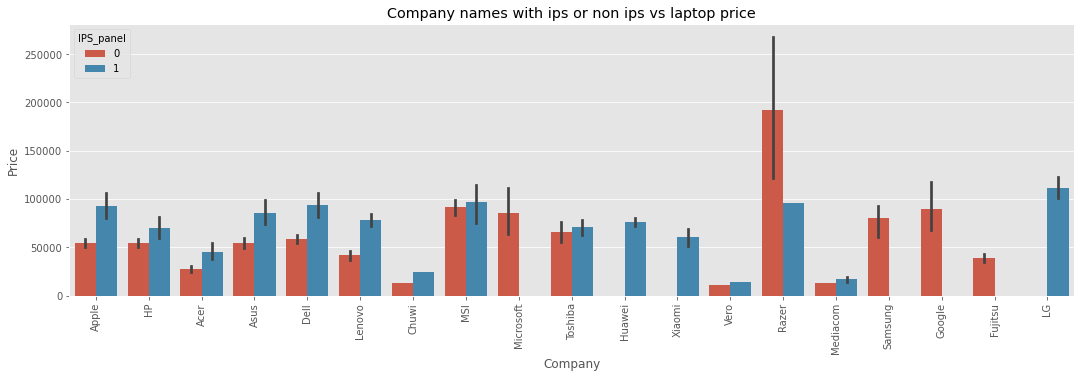

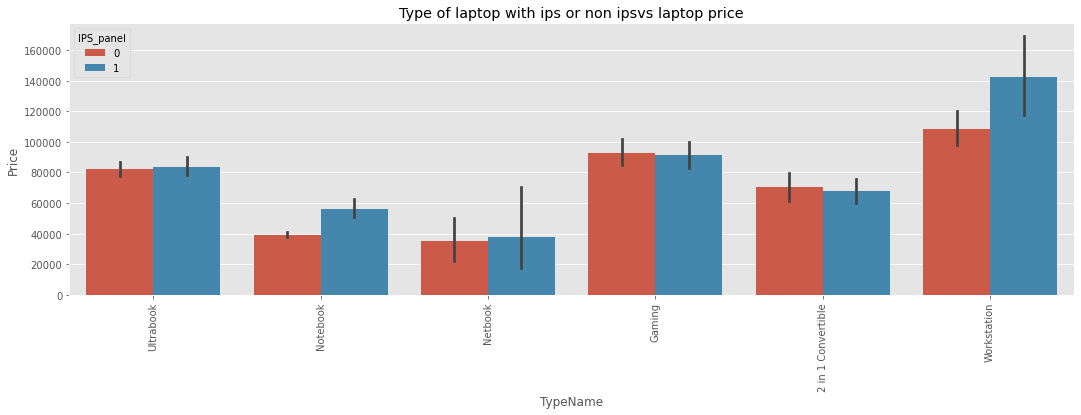

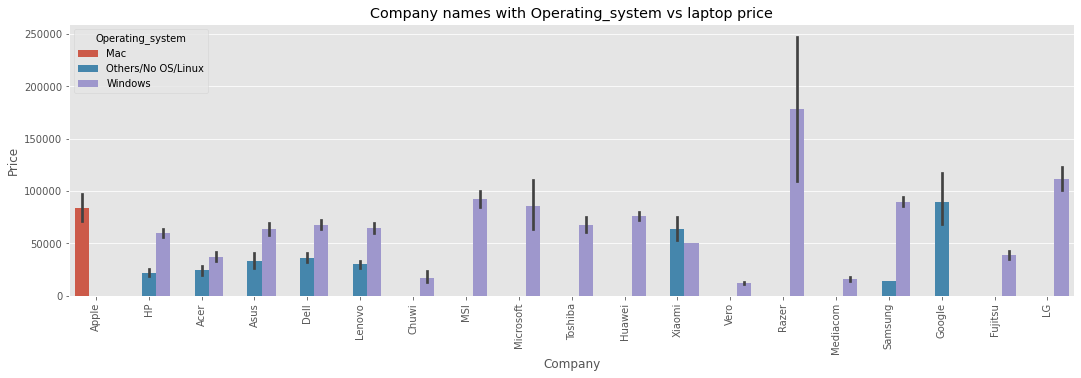

In [720]:
plt.figure(figsize=[18,5])
sns.barplot(x=data['Company'], y=data['Price'], hue=data.IPS_panel)
plt.xticks(rotation= 'vertical')
plt.title('Company names with ips or non ips vs laptop price')
plt.show()

print()

plt.figure(figsize=[18,5])
sns.barplot(x=data['TypeName'], y=data['Price'], hue=data.IPS_panel)
plt.xticks(rotation= 'vertical')
plt.title('Type of laptop with ips or non ipsvs laptop price')
plt.show()

print()
plt.figure(figsize=[18,5])
sns.barplot(x=data['Company'], y=data['Price'], hue=data.Operating_system)
plt.xticks(rotation= 'vertical')
plt.title('Company names with Operating_system vs laptop price')
plt.show()

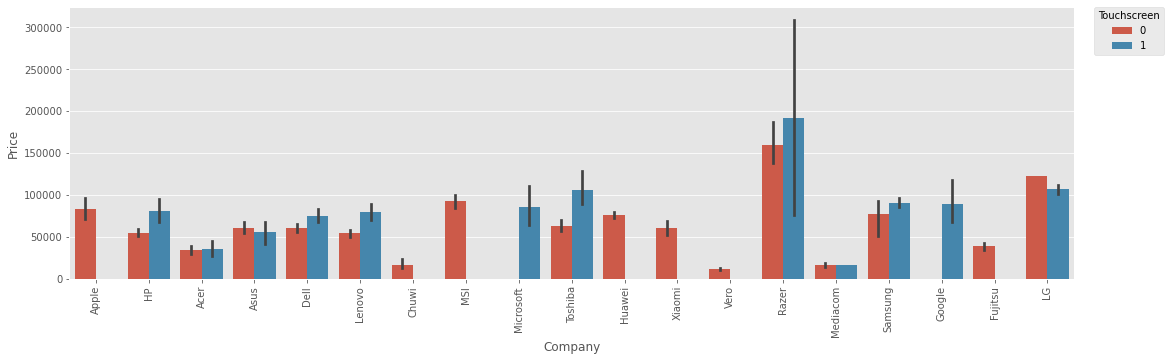

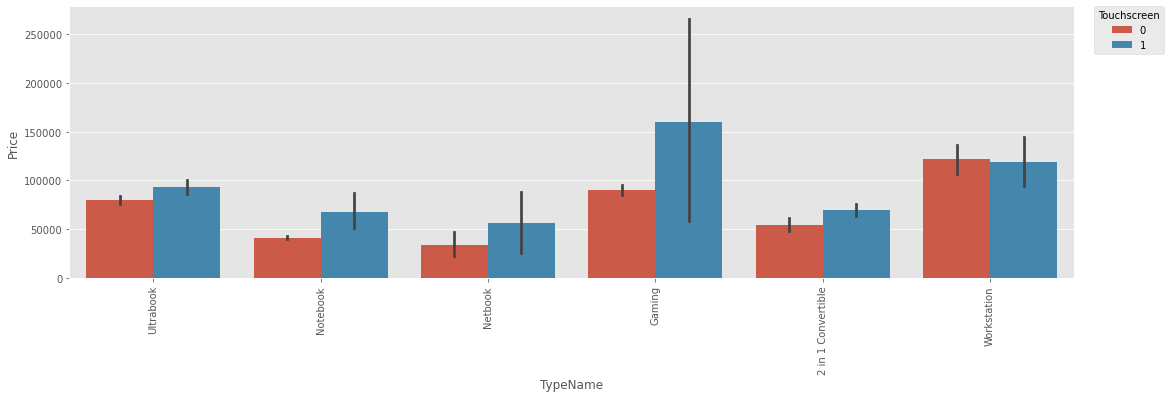

In [721]:
plt.figure(figsize=[18,5])
sns.barplot(x=data['Company'], y=data['Price'], hue=data.Touchscreen)
plt.xticks(rotation= 'vertical')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Touchscreen')

plt.figure(figsize=[18,5])
sns.barplot(x=data['TypeName'], y=data['Price'], hue=data.Touchscreen)
plt.xticks(rotation= 'vertical')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Touchscreen')
plt.show()

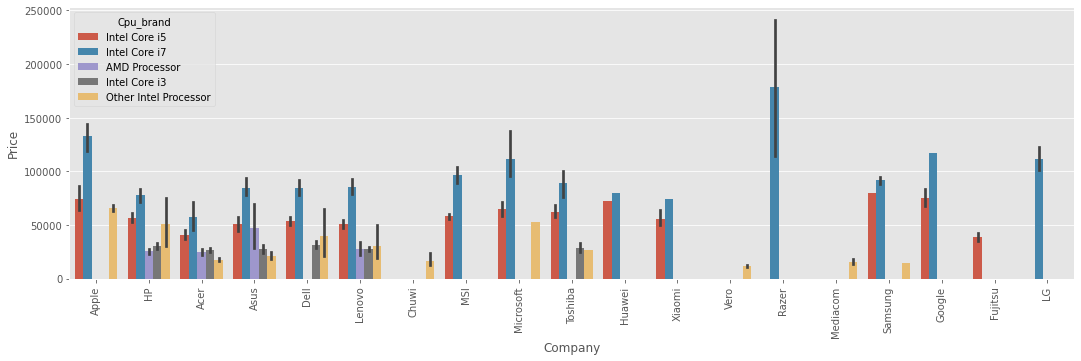

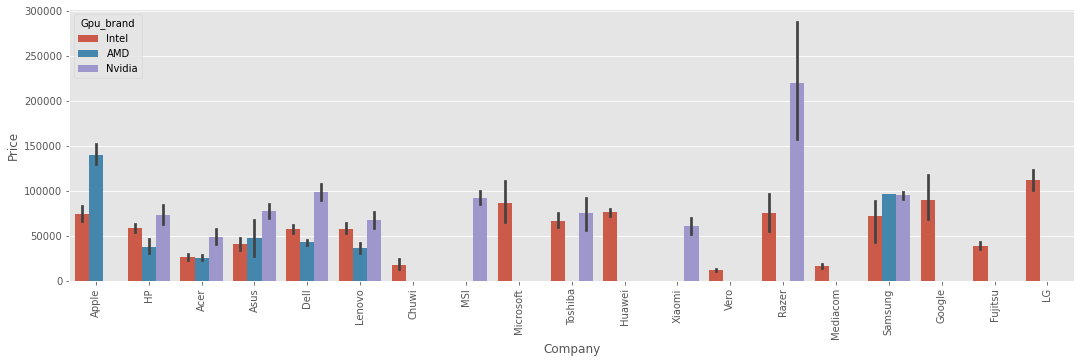

In [722]:
plt.figure(figsize=[18,5])
sns.barplot(x=data['Company'], y=data['Price'], hue=data.Cpu_brand)
plt.xticks(rotation= 'vertical')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Touchscreen')

plt.figure(figsize=[18,5])
sns.barplot(x=data['Company'], y=data['Price'], hue=data.Gpu_brand)
plt.xticks(rotation= 'vertical')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Touchscreen')
plt.show()

##### Taking inputs for Model Building

In [723]:
X=data.drop(columns=['Price'])
y=np.log(data.Price)

In [724]:
#X,y

In [725]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, train_size=0.8,random_state=2)

### Linear Regression

In [726]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

CT=ColumnTransformer(transformers=[
    ('ct1',OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from sklearn.linear_model import LinearRegression

Lr=LinearRegression()


from sklearn.pipeline import Pipeline

pipe=Pipeline([
    ('CT',CT),
    ('Lr',Lr)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

In [727]:
from sklearn.metrics import r2_score,mean_absolute_error


print("R2 score:",r2_score(y_true=y_test, y_pred=y_pred)*100)
print("MAE score:",mean_absolute_error(y_true=y_test, y_pred=y_pred))

R2 score: 79.54669389376654
MAE score: 0.20907192096349148


### Random Forest

In [728]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

CT=ColumnTransformer(transformers=[
    ('ct1',OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from sklearn.ensemble import RandomForestRegressor

Rfr=RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)


from sklearn.pipeline import Pipeline

pipe=Pipeline([
    ('CT',CT),
    ('Rfr',Rfr)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

In [729]:
from sklearn.metrics import r2_score,mean_absolute_error


print("R2 score:",r2_score(y_true=y_test, y_pred=y_pred)*100)
print("MAE score:",mean_absolute_error(y_true=y_test, y_pred=y_pred))

R2 score: 85.72074320990023
MAE score: 0.17093146884236615


### Ridge Regression

In [730]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

CT=ColumnTransformer(transformers=[
    ('ct1',OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

from sklearn.linear_model import Ridge

Rr=Ridge()


from sklearn.pipeline import Pipeline

pipe=Pipeline([
    ('CT',CT),
    ('Rr',Rr)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

In [731]:
from sklearn.metrics import r2_score,mean_absolute_error


print("R2 score:",r2_score(y_true=y_test, y_pred=y_pred)*100)
print("MAE score:",mean_absolute_error(y_true=y_test, y_pred=y_pred))

R2 score: 80.26522977111085
MAE score: 0.2051401712852402
